# Ok lets do some basic analysis

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '../Dataset.xlsx'
df = pd.read_excel(file_path)

In [13]:

# Convert 'W/L' column to binary (1 for Win, 0 for Loss)
df['W/L'] = df['W/L'].apply(lambda x: 1 if x == 'W' else 0)

# Select features and target variable
features = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
            'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']
target = 'W/L'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Get feature importances
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print('Feature Importances:')
print(feature_importances)

# Function to predict the outcome of a match between two teams based on their average performance metrics
def predict_match_outcome(team1_stats, team2_stats):
    # Combine the stats of both teams into a single DataFrame
    match_data = pd.DataFrame({
        'PTS': [team1_stats['PTS'], team2_stats['PTS']],
        'FGM': [team1_stats['FGM'], team2_stats['FGM']],
        'FGA': [team1_stats['FGA'], team2_stats['FGA']],
        'FG%': [team1_stats['FG%'], team2_stats['FG%']],
        '3PM': [team1_stats['3PM'], team2_stats['3PM']],
        '3PA': [team1_stats['3PA'], team2_stats['3PA']],
        '3P%': [team1_stats['3P%'], team2_stats['3P%']],
        'FTM': [team1_stats['FTM'], team2_stats['FTM']],
        'FTA': [team1_stats['FTA'], team2_stats['FTA']],
        'FT%': [team1_stats['FT%'], team2_stats['FT%']],
        'OREB': [team1_stats['OREB'], team2_stats['OREB']],
        'DREB': [team1_stats['DREB'], team2_stats['DREB']],
        'REB': [team1_stats['REB'], team2_stats['REB']],
        'AST': [team1_stats['AST'], team2_stats['AST']],
        'STL': [team1_stats['STL'], team2_stats['STL']],
        'BLK': [team1_stats['BLK'], team2_stats['BLK']],
        'TOV': [team1_stats['TOV'], team2_stats['TOV']],
        'PF': [team1_stats['PF'], team2_stats['PF']],
        '+/-': [team1_stats['+/-'], team2_stats['+/-']]
    })

    # Predict the outcome for both teams
    predictions = clf.predict(match_data)
    
    # Determine the winner
    if predictions[0] == 1 and predictions[1] == 0:
        return "Team 1 is predicted to win"
    elif predictions[0] == 0 and predictions[1] == 1:
        return "Team 2 is predicted to win"
    else:
        return "It's a tie or unclear prediction"
    
# Example usage
team1_stats = {
    'PTS': 110, 'FGM': 40, 'FGA': 90, 'FG%': 44.4, '3PM': 12, '3PA': 30, '3P%': 40.0,
    'FTM': 18, 'FTA': 22, 'FT%': 81.8, 'OREB': 10, 'DREB': 30, 'REB': 40, 'AST': 25,
    'STL': 8, 'BLK': 5, 'TOV': 12, 'PF': 20, '+/-': 5
}

team2_stats = {
    'PTS': 105, 'FGM': 38, 'FGA': 88, 'FG%': 43.2, '3PM': 10, '3PA': 28, '3P%': 35.7,
    'FTM': 15, 'FTA': 20, 'FT%': 75.0, 'OREB': 12, 'DREB': 28, 'REB': 40, 'AST': 22,
    'STL': 7, 'BLK': 6, 'TOV': 14, 'PF': 18, '+/-': 3
}

print(predict_match_outcome(team1_stats, team2_stats))

ValueError: could not convert string to float: '-'

In [6]:
print(df.info())
print("\nSummary statistics for columns:")
print(df.describe())
print(len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       2460 non-null   object 
 1   Match Up   2460 non-null   object 
 2   Game Date  2460 non-null   object 
 3   W/L        2460 non-null   int64  
 4   MIN        2460 non-null   int64  
 5   PTS        2460 non-null   int64  
 6   FGM        2460 non-null   int64  
 7   FGA        2460 non-null   int64  
 8   FG%        2460 non-null   float64
 9   3PM        2460 non-null   int64  
 10  3PA        2460 non-null   int64  
 11  3P%        2460 non-null   float64
 12  FTM        2460 non-null   int64  
 13  FTA        2460 non-null   int64  
 14  FT%        2460 non-null   object 
 15  OREB       2460 non-null   int64  
 16  DREB       2460 non-null   int64  
 17  REB        2460 non-null   int64  
 18  AST        2460 non-null   int64  
 19  STL        2460 non-null   int64  
 20  BLK     

In [11]:
# Let's look deep into each variable

unique_values = df['FT%'].unique()
print(unique_values) 

# Filter the dataset to include only jobs with NaN experience required
nan_df = df[df['FT%'].isna()]

# Display the first few rows of the dataset with NaN experience required
print(nan_df['Team'])

# Check which rows have '-' in the 'FT%' column
rows_with_dash_in_ft_percent = df[df['FT%'] == '-']

# Display the rows
print(rows_with_dash_in_ft_percent)

[78.6 76.5 75 80 91.7 79.3 73.1 53.8 80.8 74.2 81.3 60 77.3 84.6 85 83.3
 88.5 72.7 76.9 81.8 62.5 68.8 90 73.9 77.8 67.9 69.4 78.3 50 68.4 90.9
 85.7 71.4 84 82.6 66.7 69 65.6 64 78.9 57.1 92.9 100 43.8 73.7 82.4 70.8
 94.7 87.5 86.4 61.9 71.9 61.5 79.2 41.2 46.7 95 94.4 83.9 72.2 65 69.2
 82.1 73.3 57.6 69.6 58.3 92 86.7 72 58.6 70 90.6 96.4 96.3 63 64.3 78.1
 94.3 92.3 76 52.9 88.2 64.7 77.4 81 85.2 76.7 90.5 84.2 89.7 84.4 95.7 55
 95.2 76.2 88.9 52 61.3 93.8 75.9 63.2 95.5 74.3 93.3 68.2 73 73.5 93.1
 74.1 85.4 48 63.6 81.1 59.1 65.2 68 70.4 69.7 97.1 87.1 91.3 95.8 52.4
 80.6 81.5 87 72.4 62.1 79.4 84.8 88 94.1 65.5 81.6 75.7 82.9 78.8 82.2
 61.1 53.6 86.2 55.6 77.1 70.6 86.1 71 89.5 81.4 65.7 87.9 85.3 73.8 65.4
 64.5 77.5 75.8 58.8 90.3 56 47.4 42.9 52.2 88.6 80.5 62.8 60.7 53.3 89.3
 64.9 72.5 82.8 67.7 91.4 45.5 70.7 93.9 67.6 96 52.6 96.8 79.1 70.3 75.6
 59.4 60.9 56.3 92.6 56.5 72.1 59.5 88.4 74.4 54.5 96.2 57.9 78.4 68.3
 44.4 91.9 54.2 93.5 37.5 56.7 38.9 33.3 '-' 35.7]
S

# EXploring

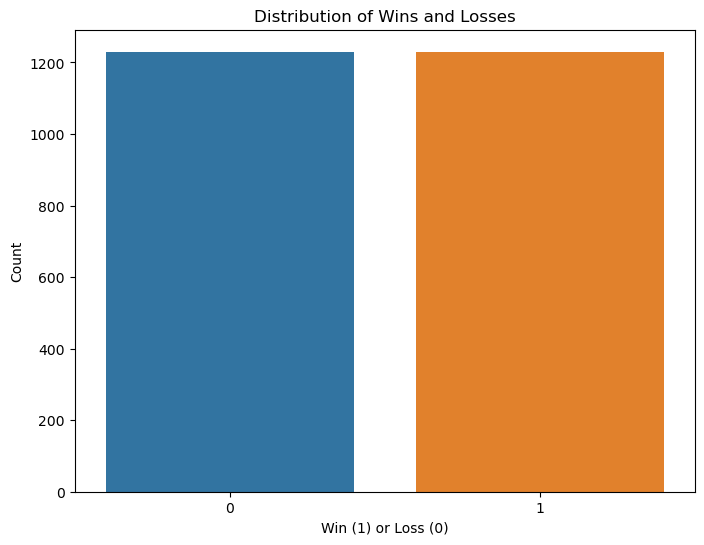

ValueError: could not convert string to float: 'GSW'

<Figure size 1600x1200 with 0 Axes>

In [16]:


# Exploratory Data Analysis (EDA)
# Plot the distribution of wins and losses
plt.figure(figsize=(8, 6))
sns.countplot(x='W/L', data=df)
plt.title('Distribution of Wins and Losses')
plt.xlabel('Win (1) or Loss (0)')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Box plots for key features
key_features = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 
                'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='W/L', y=feature, data=df)
    plt.title(f'Box plot of {feature} by Win/Loss')
    plt.xlabel('Win (1) or Loss (0)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Pair plot for key features
sns.pairplot(df, vars=key_features, hue='W/L')
plt.suptitle('Pair Plot of Key Features by Win/Loss')
plt.show()

# Summary statistics for wins and losses
win_stats = df[df['W/L'] == 1].describe()
loss_stats = df[df['W/L'] == 0].describe()

print("Summary Statistics for Wins:")
print(win_stats)

print("\nSummary Statistics for Losses:")
print(loss_stats)